In [238]:
%matplotlib inline
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd



# Problem 1

In [239]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_un_non = 0.1 * t_u
t_un_lin = 0.1 * t_u

w = torch.ones(())

w2 = torch.ones(())
w1 = torch.ones(())
b = torch.zeros(())

In [240]:
# Nonlinear model for regression. 
def model_nonlin(t_u, w2, w1, b):
    return w2 * t_u ** 2  + w1 * t_u + b
def dmodel_dw2(t_u, w2, w1, b):
    return t_u**2
def dmodel_dw1(t_u, w2, w1, b):
    return t_u;
def dmodel_db_nonlin(t_u, w2, w1, b):
    return 1.0
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()
def dloss_fn(t_p, t_c):
    dsq_diffs=2* (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def grad_fn_nonlin(t_u, t_c, t_p, w2, w1, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w2, w1, b)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w2, w1, b)
    dloss_db = dloss_dtp * dmodel_db_nonlin(t_u, w2, w1, b)
    return torch.stack([dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])


In [241]:
# linear model for regression
def model_lin(t_u, w, b):
    return w * t_u + b

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db_lin(t_u, w, b):
    return 1.0

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def dloss_fn(t_p, t_c):
    dsq_diffs=2* (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def grad_fn_lin(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db_lin(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [242]:
# Training loop for nonlinear model.
def training_loop_nonlin(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w2, w1, b = params
        t_p = model_nonlin(t_u, w2, w1, b) 
        loss = loss_fn(t_p, t_c)
        
        grad = grad_fn_nonlin(t_u, t_c, t_p, w2, w1, b)
        params = params - learning_rate * grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [243]:
# At different learning rates, print the loss over the 500th epoch. 
rate = [1e-2, 1e-3, 1e-4, 1e-5]

for learning_rate in rate:
    print(f'=============== Learning Rate = {learning_rate} ===============')
    params = torch.tensor([1.0, 1.0, 0.0])
    params = training_loop_nonlin(
        n_epochs = 5000, 
        learning_rate = learning_rate,
        params = params, 
        t_u = t_un_non,
        t_c = t_c)
    params

=============== Learning Rate = 0.01 ===============
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
=============== Learning Rate = 0.001 ===============
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
=============== Learning Rate = 0.0001 ===============
Epoch 500, Loss 10.708597
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123476
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744
=============== Learning Rate = 1e-05 ===============
Epoch 500, Loss 13.269526
Epoch 1000, Loss 12.944256
Epoch 1500, Loss 12.629864
Epoch 2000, Loss 12.325988

In [244]:
params = torch.tensor([1.0, 1.0, 0.0])
learning_rate = 1e-4

params = training_loop_nonlin(
    n_epochs = 5000, 
    learning_rate = learning_rate,
    params = params, 
    t_u = t_un_non,
    t_c = t_c)
params

Epoch 500, Loss 10.708597
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123476
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


tensor([ 0.5570, -0.8881, -0.8753])

In [245]:
def training_loop_lin(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model_lin(t_u, w, b) 
        loss = loss_fn(t_p, t_c)
        
        grad = grad_fn_lin(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [246]:
params_linear = torch.tensor([1.0, 0.0])
learning_rate = 1e-2

params_linear = training_loop_lin(
    n_epochs = 5000, 
    learning_rate = learning_rate,
    params = params_linear, 
    t_u = t_un_lin,
    t_c = t_c)
params_linear

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927680
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927648


tensor([  5.3671, -17.3012])

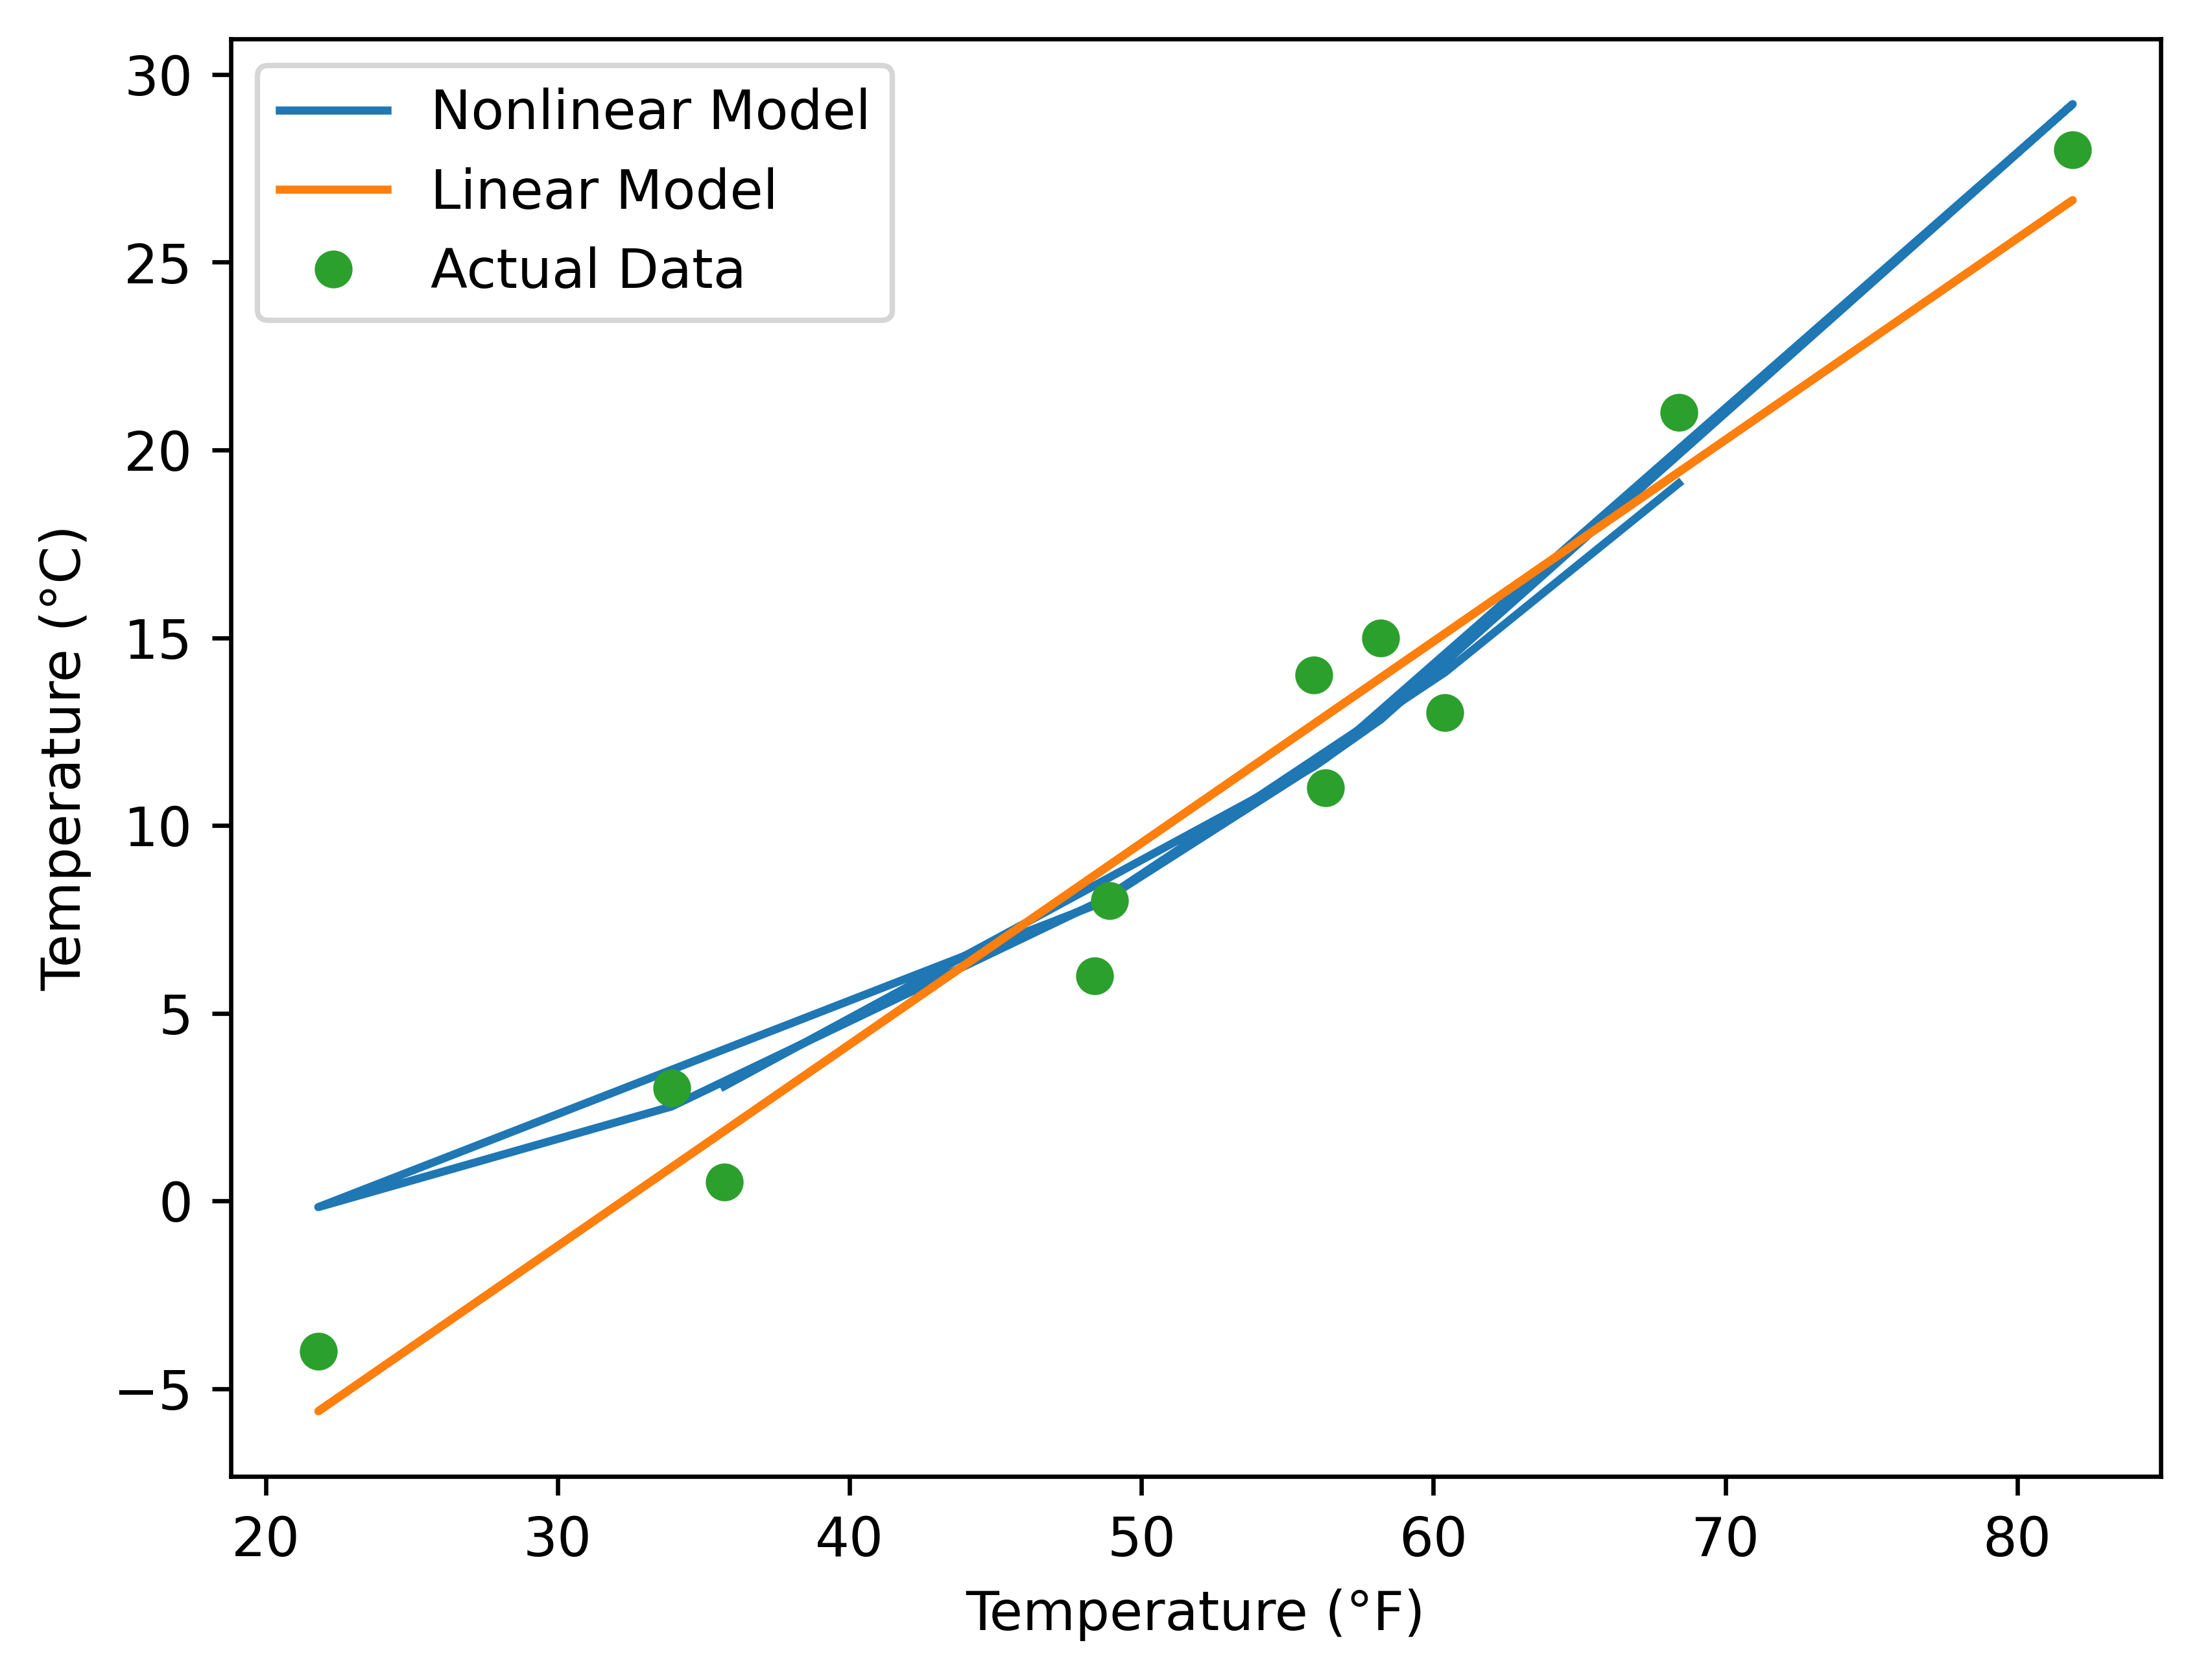

In [247]:
t_p_nonlinear = model_nonlin(t_un_non, *params)  
t_p_linear = model_lin(t_un_lin, *params_lin)  

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°F)")
plt.ylabel("Temperature (°C)")
plt.plot(t_u.numpy(), t_p_nonlinear.detach().numpy(), label = "Nonlinear Model") 
plt.plot(t_u.numpy(), t_p_linear.detach().numpy(), label = "Linear Model") 
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label = "Actual Data")
plt.legend()
plt.show()

# Problem 2

In [249]:
housing = pd.read_csv(r'C:\Users\achica1\Desktop\ML-DataSets\Housing.csv')
vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
data = housing[vars]
data.head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [250]:
scaled = StandardScaler()
scaled_data_raw = scaled.fit_transform(data.values[:,:])
scaled_data = pd.DataFrame(scaled_data_raw)

X = scaled_data.values[:,0:5]
Y = scaled_data.values[:,5]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [251]:
area_train = torch.tensor(X_train[:,0])
bedrooms_train = torch.tensor(X_train[:,1])
bathrooms_train = torch.tensor(X_train[:,2])
stories_train = torch.tensor(X_train[:,3])
parking_train = torch.tensor(X_train[:,4])
price_train = torch.tensor(Y_train)

w1 = torch.ones(())
w2 = torch.ones(())
w3 = torch.ones(())
w4 = torch.ones(())
w5 = torch.ones(())
b = torch.zeros(())

area_test = torch.tensor(X_test[:,0])
bedrooms_test = torch.tensor(X_test[:,1])
bathrooms_test = torch.tensor(X_test[:,2])
stories_test = torch.tensor(X_test[:,3])
parking_test = torch.tensor(X_test[:,4])
price_test = torch.tensor(Y_test)

w1 = torch.ones(())
w2 = torch.ones(())
w3 = torch.ones(())
w4 = torch.ones(())
w5 = torch.ones(())
b = torch.zeros(())

In [252]:
def model(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b):
    return w5*parking + w4*stories + w3*bathrooms + w2*bedrooms + w1*area + b

def loss_fn(t_p, price):
    squared_diffs = (t_p - price)**2
    return squared_diffs.mean()

def dloss_fn(t_p, price):
    dsq_diffs=2* (t_p - price) / t_p.size(0)
    return dsq_diffs

def dmodel_dw5(parking, w5, b):
    return parking

def dmodel_dw4(stories, w4, b):
    return stories

def dmodel_dw3(bathrooms, w3, b):
    return bathrooms

def dmodel_dw2(bedrooms, w2, b):
    return bedrooms

def dmodel_dw1(area, w1, b):
    return area

def dmodel_db(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b):
    return 1.0

def grad_fn(area, bedrooms, bathrooms, stories, parking, price, t_p, w1, w2, w3, w4, w5, b):
    dloss_dtp = dloss_fn(t_p, price)
    dloss_dw5 = dloss_dtp * dmodel_dw5(parking, w5, b)
    dloss_dw4 = dloss_dtp * dmodel_dw4(stories, w4, b)
    dloss_dw3 = dloss_dtp * dmodel_dw3(bathrooms, w3, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(bedrooms, w2, b)
    dloss_dw1 = dloss_dtp * dmodel_dw1(area, w1, b)
    dloss_db = dloss_dtp * dmodel_db(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b)
    return torch.stack([dloss_dw5.sum(),dloss_dw4.sum(),dloss_dw3.sum(),dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])

def training_loop(n_epochs, learning_rate, params, area, bedrooms, bathrooms, stories, parking, price):
    print(f'=============== Learning Rate = {learning_rate} ===============')
    for epoch in range(1, n_epochs + 1):
        w1, w2, w3, w4, w5, b = params
        t_p = model(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b)
        loss = loss_fn(t_p, price)
    
        grad = grad_fn(area, bedrooms, bathrooms, stories, parking, price, t_p, w1, w2, w3, w4, w5, b)
        params = params - learning_rate * grad
    
        if epoch == 1 or epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params, loss


In [253]:
rate = [1e-2, 1e-3, 1e-4, 1e-5]
for learning_rate in rate:
    params_train = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0])
    learning_rate = learning_rate
    training_loop(
        n_epochs = 5000, 
        learning_rate = learning_rate, 
        params = params_train, 
        area = area_train, 
        bedrooms = bedrooms_train, 
        bathrooms = bathrooms_train, 
        stories = stories_train, 
        parking = parking_train, 
        price = price_train)

=============== Learning Rate = 0.01 ===============
Epoch 1, Loss 5.965522
Epoch 500, Loss 15429.993929
Epoch 1000, Loss 8169457599.081010
Epoch 1500, Loss 4544116725205980.000000
Epoch 2000, Loss 2555540409318029393920.000000
Epoch 2500, Loss 1440598518220296344276303872.000000
Epoch 3000, Loss 812497726786145530359950608433152.000000
Epoch 3500, Loss 458297996344184245923247564556133728256.000000
Epoch 4000, Loss 258513769954810306486788190018636348584361984.000000
Epoch 4500, Loss 145821484133829767796344972890715910412771017097216.000000
Epoch 5000, Loss 82254524482028267379183529462016773486862327513446612992.000000
=============== Learning Rate = 0.001 ===============
Epoch 1, Loss 5.965522
Epoch 500, Loss 0.723786
Epoch 1000, Loss 0.947568
Epoch 1500, Loss 2.219570
Epoch 2000, Loss 6.920083
Epoch 2500, Loss 24.304790
Epoch 3000, Loss 88.795261
Epoch 3500, Loss 328.680360
Epoch 4000, Loss 1223.135553
Epoch 4500, Loss 4565.388574
Epoch 5000, Loss 17077.598883
=============== Lear

In [254]:
print("Loss from the Training model: Linear Regression")
params_train = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0])
learning_rate = 1e-4
params_train = training_loop(
    n_epochs = 5000, 
    learning_rate = learning_rate, 
    params = params_train, 
    area = area_train, 
    bedrooms = bedrooms_train, 
    bathrooms = bathrooms_train, 
    stories = stories_train, 
    parking = parking_train, 
    price = price_train)
params_train

Loss from the Training model: Linear Regression
=============== Learning Rate = 0.0001 ===============
Epoch 1, Loss 5.965522
Epoch 500, Loss 4.251940
Epoch 1000, Loss 3.078354
Epoch 1500, Loss 2.277433
Epoch 2000, Loss 1.731910
Epoch 2500, Loss 1.361596
Epoch 3000, Loss 1.111678
Epoch 3500, Loss 0.944710
Epoch 4000, Loss 0.835139
Epoch 4500, Loss 0.765556
Epoch 5000, Loss 0.724139


(tensor([ 0.2746,  0.4192,  0.3749,  0.1775,  0.5251, -0.0031],
        dtype=torch.float64),
 tensor(0.7241, dtype=torch.float64))

In [255]:
# Validation Model
rate = [1e-2, 1e-3, 1e-4, 1e-5]
for learning_rate in rate:
    params_test = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0])
    learning_rate = learning_rate
    training_loop(
        n_epochs = 5000, 
        learning_rate = learning_rate, 
        params = params_test, 
        area = area_test, 
        bedrooms = bedrooms_test, 
        bathrooms = bathrooms_test, 
        stories = stories_test, 
        parking = parking_test, 
        price = price_test)

=============== Learning Rate = 0.01 ===============
Epoch 1, Loss 6.422749
Epoch 500, Loss 3747.592104
Epoch 1000, Loss 399885318.469560
Epoch 1500, Loss 46542146546085.039062
Epoch 2000, Loss 5631467045934208000.000000
Epoch 2500, Loss 692293233971147963367424.000000
Epoch 3000, Loss 85638702341912930729141993472.000000
Epoch 3500, Loss 10619407736953381105360932159094784.000000
Epoch 4000, Loss 1318059036807454211138020616974345699328.000000
Epoch 4500, Loss 163653292851367088010712139032497273677283328.000000
Epoch 5000, Loss 20322364690552330273618344646039723414634857758720.000000
=============== Learning Rate = 0.001 ===============
Epoch 1, Loss 6.422749
Epoch 500, Loss 0.578541
Epoch 1000, Loss 0.731333
Epoch 1500, Loss 1.598271
Epoch 2000, Loss 4.355404
Epoch 2500, Loss 13.053470
Epoch 3000, Loss 40.525670
Epoch 3500, Loss 127.455068
Epoch 4000, Loss 403.031064
Epoch 4500, Loss 1278.185959
Epoch 5000, Loss 4062.130062
=============== Learning Rate = 0.0001 ===============
Epo

In [256]:
# Linear Regression of the Validation model's loss

params_test = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0])
learning_rate = 1e-4
params_test = training_loop(
    n_epochs = 5000, 
    learning_rate = learning_rate, 
    params = params_test, 
    area = area_test, 
    bedrooms = bedrooms_test, 
    bathrooms = bathrooms_test, 
    stories = stories_test, 
    parking = parking_test, 
    price = price_test)
params_test

=============== Learning Rate = 0.0001 ===============
Epoch 1, Loss 6.422749
Epoch 500, Loss 4.419614
Epoch 1000, Loss 3.085965
Epoch 1500, Loss 2.200358
Epoch 2000, Loss 1.612678
Epoch 2500, Loss 1.223355
Epoch 3000, Loss 0.966349
Epoch 3500, Loss 0.797858
Epoch 4000, Loss 0.688848
Epoch 4500, Loss 0.620083
Epoch 5000, Loss 0.578841


(tensor([0.4858, 0.4767, 0.2127, 0.1545, 0.3222, 0.0085],
        dtype=torch.float64),
 tensor(0.5788, dtype=torch.float64))

# problem 3

In [259]:
housing = pd.read_csv(r'C:\Users\achica1\Desktop\ML-DataSets\Housing.csv')
vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
data = housing[vars]
data.head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [260]:
scaled = StandardScaler()
scaled_data_raw = scaled.fit_transform(data.values[:,:])
scaled_data = pd.DataFrame(scaled_data_raw)

X_data = torch.tensor(scaled_data.values[:,0:5], dtype=torch.float32)
Y_data = torch.tensor(scaled_data.values[:,5], dtype=torch.float32)

In [261]:
# Splitting the dataset using training and validation split
n_samples = X_data.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

X_train = X_data[train_indices]
Y_train_raw = Y_data[train_indices]
Y_train = torch.reshape(Y_train_raw, (436,1))

X_val = X_data[val_indices]
Y_val_raw = Y_data[val_indices]
Y_val = torch.reshape(Y_val_raw, (109,1))

In [263]:
def training_loop(n_epochs, optimizer, model, loss_fn, X_train, X_val, Y_train, Y_val, epochs, train_loss, val_loss):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(X_train) 
        loss_train = loss_fn(t_p_train, Y_train)

        t_p_val = model(X_val)
        loss_val = loss_fn(t_p_val, Y_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        epochs.append(epoch)
        train_loss.append(loss_train.item())
        val_loss.append(loss_val.item())
        if epoch == 1 or epoch % 40 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
            
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [267]:
# Problem 3a

from collections import OrderedDict

seq_model_one = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(5, 8)),
    ('hidden_activation', nn.ReLU()),
    ('output_linear', nn.Linear(8, 1))
]))

optimizer = optim.SGD(seq_model_one.parameters(), lr=0.07)

one_epochs = []
one_train_loss = []
one_val_loss = []

print("one hidden layer:")
params_one = training_loop(n_epochs = 200, optimizer = optimizer, model = seq_model_one, loss_fn = loss_fn, X_train = X_train, 
    X_val = X_val, Y_train = Y_train, Y_val = Y_val, epochs = one_epochs, train_loss = one_train_loss, val_loss = one_val_loss)
params_one

one hidden layer:
Epoch 1, Training loss 1.0766, Validation loss 1.2084
Epoch 40, Training loss 0.4976, Validation loss 0.3323
Epoch 80, Training loss 0.4657, Validation loss 0.3115
Epoch 120, Training loss 0.4593, Validation loss 0.3035
Epoch 160, Training loss 0.4570, Validation loss 0.2991
Epoch 200, Training loss 0.4553, Validation loss 0.2967


In [268]:
seq_model_three = nn.Sequential(OrderedDict([
    ('hidden_linear_1', nn.Linear(5, 8)),
    ('hidden_activation_1', nn.ReLU()),
    ('hidden_linear_2', nn.Linear(8, 8)),
    ('hidden_activation_2', nn.ReLU()),
    ('hidden_linear_3', nn.Linear(8, 8)),
    ('hidden_activation_3', nn.ReLU()),
    ('output_linear', nn.Linear(8, 1))
]))

optimizer = optim.SGD(seq_model_three.parameters(), lr=0.095)

three_epochs = []
three_train_loss = []
three_val_loss = []

print("three hidden layers:")
params_three = training_loop(n_epochs = 200, optimizer = optimizer, model = seq_model_three, loss_fn = loss_fn,
    X_train = X_train, X_val = X_val, Y_train = Y_train, Y_val = Y_val, epochs = three_epochs, train_loss = three_train_loss, 
    val_loss = three_val_loss)
params_three

three hidden layers:
Epoch 1, Training loss 1.0375, Validation loss 1.0815
Epoch 40, Training loss 0.6212, Validation loss 0.5867
Epoch 80, Training loss 0.4976, Validation loss 0.4057
Epoch 120, Training loss 0.4580, Validation loss 0.3547
Epoch 160, Training loss 0.4610, Validation loss 0.3519
Epoch 200, Training loss 0.4425, Validation loss 0.3395
